### Project Name: Airline Sentiment Analyzer
 Goal: Analyze 14k+ tweets to identify why customers are unhappy with airlines and build a dashboard to showcase insights.
Skills Demonstrated: Data cleaning, EDA, NLP (VADER), Time-Series Analysis, Dashboarding.

 ***All graphs for the Airline Sentiment Analysis project***

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
# Creating a directory to save graphs
os.makedirs("graphs", exist_ok=True)

In [4]:
# Load cleaned data
df = pd.read_csv("Cleaned_Tweets.csv")

# 1. Sentiment Distribution

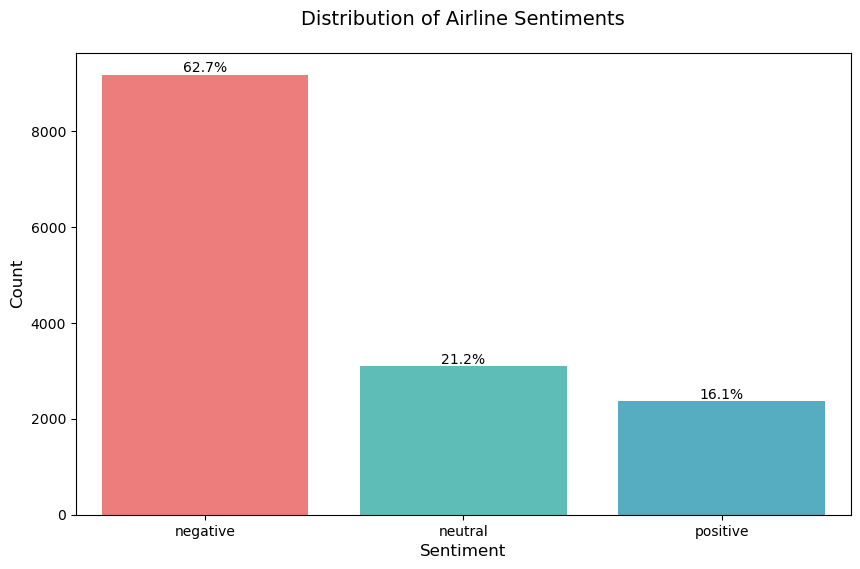

In [11]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(
    x='airline_sentiment',
    data=df,
    order=['negative', 'neutral', 'positive'],
    palette=['#ff6b6b', '#4ecdc4', '#45b7d1']
)
plt.title("Distribution of Airline Sentiments", fontsize=14, pad=20)
plt.xlabel("Sentiment", fontsize=12)
plt.ylabel("Count", fontsize=12)
# Add percentage labels
total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 50
    ax.text(x, y, percentage, ha='center', fontsize=10)

plt.savefig("graphs/sentiment_distribution.png", bbox_inches='tight')
plt.show()
plt.close()



# 2. Top 5 Negative Reasons

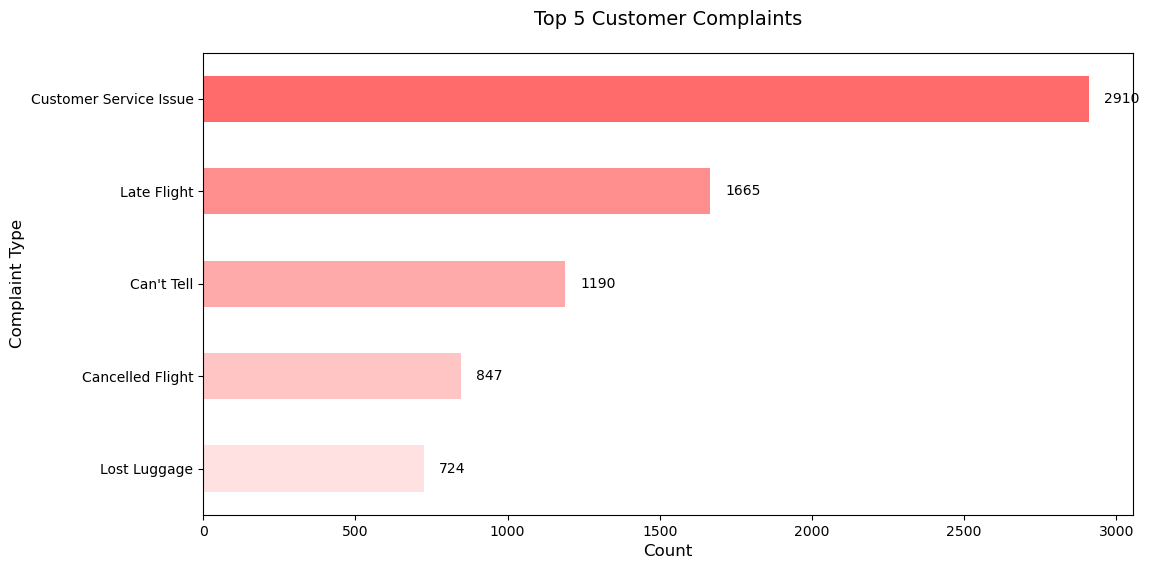

In [12]:
negative_df = df[df['airline_sentiment'] == 'negative']
top_complaints = negative_df['negativereason'].value_counts().head(5)

plt.figure(figsize=(12, 6))
top_complaints.plot(
    kind='barh',
    color=['#ff6b6b', '#ff8e8e', '#ffaaaa', '#ffc4c4', '#ffe1e1']
)
plt.gca().invert_yaxis()
plt.title("Top 5 Customer Complaints", fontsize=14, pad=20)
plt.xlabel("Count", fontsize=12)
plt.ylabel("Complaint Type", fontsize=12)

# Add labels
for i, v in enumerate(top_complaints):
    plt.text(v + 50, i, str(v), color='black', ha='left', va='center')

plt.savefig("graphs/top_complaints.png", bbox_inches='tight')
plt.show()
plt.close()

# 3. Hourly Sentiment Trends

d:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


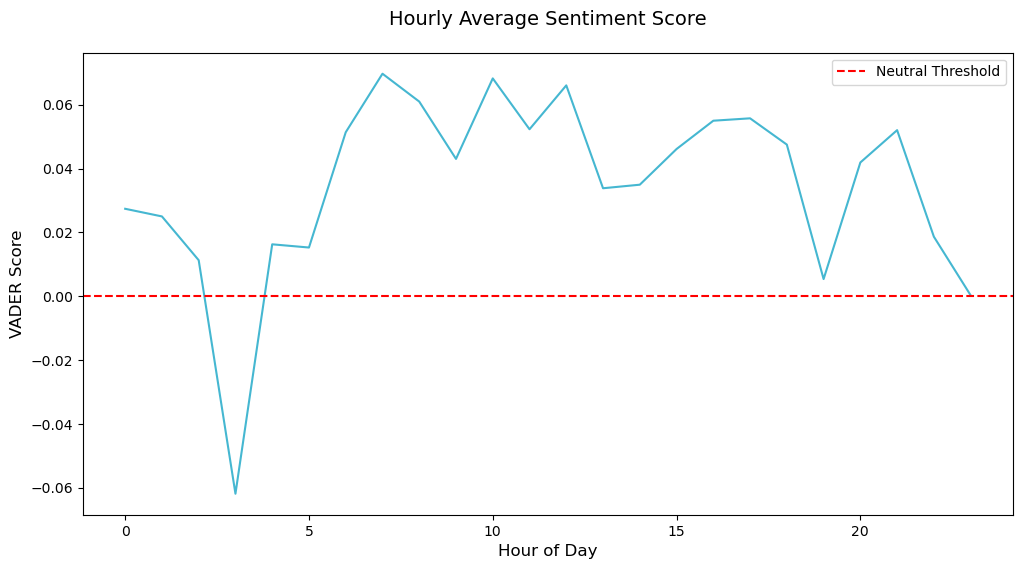

In [13]:
plt.figure(figsize=(12, 6))
hourly_sentiment = df.groupby('hour')['vader_score'].mean()
sns.lineplot(x=hourly_sentiment.index, y=hourly_sentiment.values, color='#45b7d1')
plt.axhline(0, color='red', linestyle='--', label='Neutral Threshold')
plt.title("Hourly Average Sentiment Score", fontsize=14, pad=20)
plt.xlabel("Hour of Day", fontsize=12)
plt.ylabel("VADER Score", fontsize=12)
plt.legend()
plt.savefig("graphs/hourly_sentiment.png", bbox_inches='tight')
plt.show()
plt.close()

# 4. Sentiment by Airline

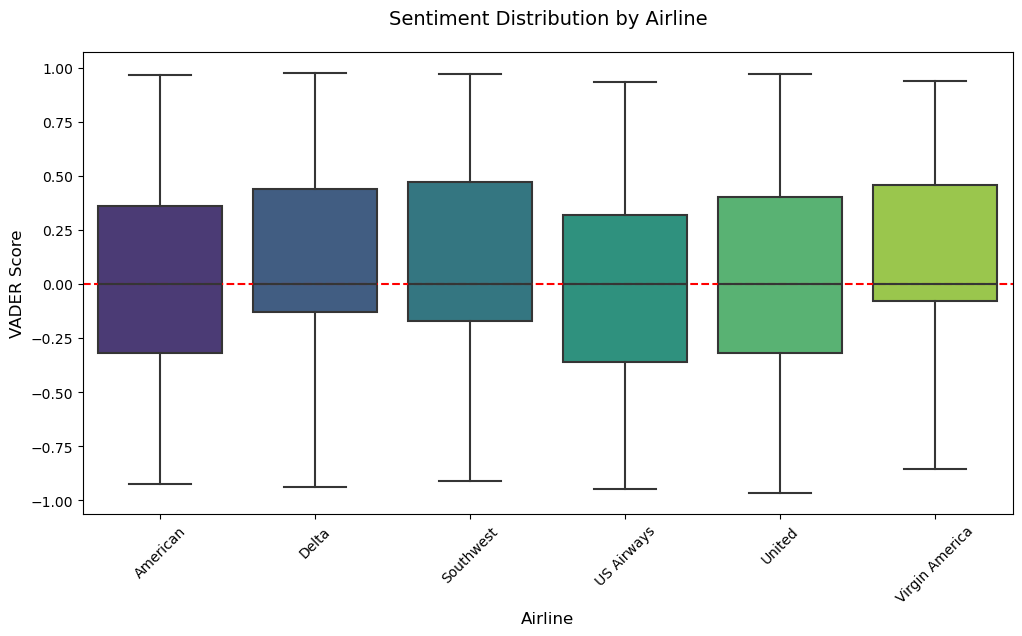

In [14]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    x='airline',
    y='vader_score',
    data=df,
    palette='viridis',
    order=df.groupby('airline')['vader_score'].median().sort_values().index
)
plt.axhline(0, color='red', linestyle='--')
plt.title("Sentiment Distribution by Airline", fontsize=14, pad=20)
plt.xlabel("Airline", fontsize=12)
plt.ylabel("VADER Score", fontsize=12)
plt.xticks(rotation=45)
plt.savefig("graphs/sentiment_by_airline.png", bbox_inches='tight')
plt.show()
plt.close()



              precision    recall  f1-score   support

    negative       0.90      0.51      0.65      9178
     neutral       0.39      0.42      0.40      3099
    positive       0.34      0.87      0.49      2363

    accuracy                           0.55     14640
   macro avg       0.54      0.60      0.51     14640
weighted avg       0.70      0.55      0.57     14640



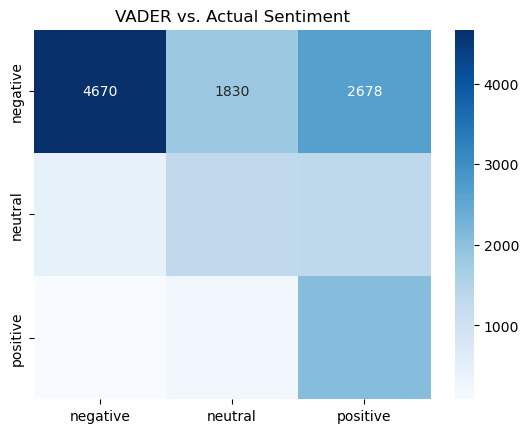

In [15]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(df['airline_sentiment'], df['vader_sentiment']))

# Confusion matrix
cm = confusion_matrix(df['airline_sentiment'], df['vader_sentiment'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['negative', 'neutral', 'positive'], 
            yticklabels=['negative', 'neutral', 'positive'])
plt.title("VADER vs. Actual Sentiment")
plt.show()

In [17]:
# Count locations (top 10)
top_locations = df['tweet_location'].value_counts().head(10)
print("Top Tweet Locations:\n", top_locations)

Top Tweet Locations:
 tweet_location
Unknown            4733
Boston, MA          157
New York, NY        156
Washington, DC      150
New York            127
USA                 126
Chicago             104
New York City        96
Los Angeles, CA      96
NYC                  95
Name: count, dtype: int64


# Calculate tweet length

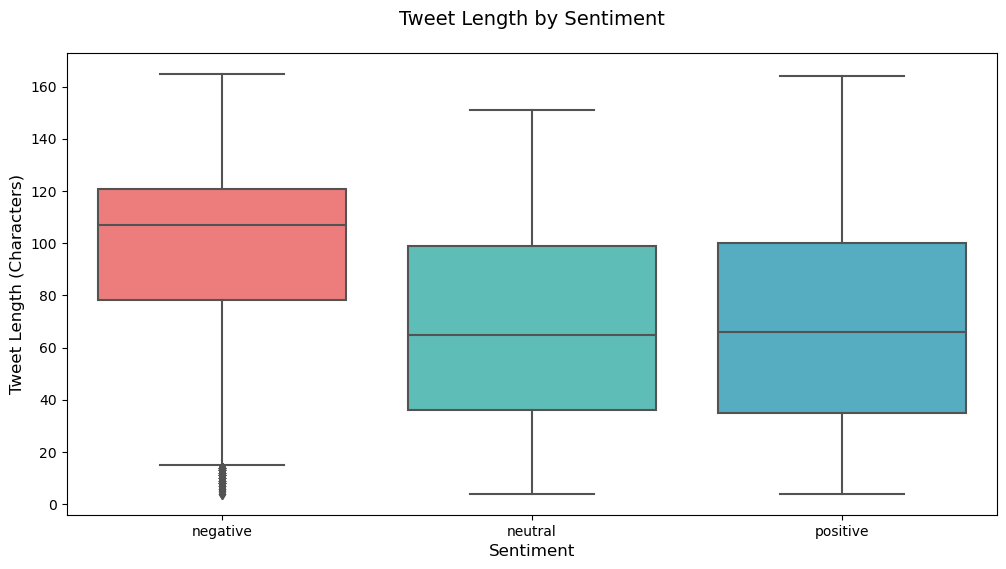

In [18]:

df['tweet_length'] = df['clean_text'].apply(len)

# Plot
plt.figure(figsize=(12, 6))
sns.boxplot(
    x='airline_sentiment', 
    y='tweet_length', 
    data=df, 
    order=['negative', 'neutral', 'positive'],
    palette=['#ff6b6b', '#4ecdc4', '#45b7d1']
)
plt.title("Tweet Length by Sentiment", fontsize=14, pad=20)
plt.xlabel("Sentiment", fontsize=12)
plt.ylabel("Tweet Length (Characters)", fontsize=12)
plt.show()